<a href="https://colab.research.google.com/github/vphcap-res/DOA_deep_learning/blob/main/DOA_Deep_20241121_1256.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Data prep**

In [1]:
import numpy as np
import pandas as pd
import random
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
import os

In [2]:
# Set random seeds
np.random.seed(42)
tf.random.set_seed(42)
random.seed(42)

In [3]:
# Ensure deterministic TensorFlow behavior
os.environ['TF_DETERMINISTIC_OPS'] = '1'
os.environ['TF_CUDNN_DETERMINISTIC'] = '1'

In [4]:
# Assuming the uploaded file is named 'DOA-managed.xlsx'
df = pd.read_excel('DOA-managed.xlsx')

In [5]:
# Select relevant columns
columns_to_select = ['distance', 'head', 'age', 'meanbw', 'temp', 'season', 'timegr', 'timetrans_min', 'lairagetime', 'classdoa']
df2 = df[columns_to_select]

In [6]:
# Encode the target variable (classdoa)
label_encoder = LabelEncoder()
df2.loc[:, 'classdoa'] = label_encoder.fit_transform(df2['classdoa'])
target = to_categorical(df2['classdoa'])  # One-hot encode the target variable

In [7]:
# Perform stratified splitting before preprocessing
predictors = df2.drop('classdoa', axis=1)
X_train, X_test, y_train, y_test = train_test_split(
    predictors,  # Features
    target,      # Labels
    test_size=0.2,  # 20% test set
    random_state=42,  # Reproducibility
    stratify=target   # Preserve class distribution
)

In [8]:
# Preprocess the training and testing data
X_train = pd.get_dummies(X_train, columns=['season', 'timegr'], drop_first=True)
X_test = pd.get_dummies(X_test, columns=['season', 'timegr'], drop_first=True)

In [9]:
# Ensure the columns in both sets match
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)

In [10]:
# Define EarlyStopping
early_stopping_monitor = EarlyStopping(patience=3, restore_best_weights=True)

# **Experiments: Selection of baseline model**

**Model 1:** Hidden layer = 1, Dense = 100

In [11]:
# -------------------------- Model 1 -----------------------------------
# Specify Model 1: Hidden layer = 1, Dense = 100
model1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
model1_training = model1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping_monitor],
    shuffle=False,
    verbose=1
)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.5519 - loss: 4.4003 - val_accuracy: 0.5859 - val_loss: 1.9827
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5606 - loss: 1.8188 - val_accuracy: 0.4804 - val_loss: 1.6362
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5895 - loss: 1.1834 - val_accuracy: 0.6360 - val_loss: 0.8212
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.6163 - loss: 0.9410 - val_accuracy: 0.6536 - val_loss: 0.7441
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6318 - loss: 0.7427 - val_accuracy: 0.6468 - val_loss: 0.7919
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.6448 - loss: 0.7308 - val_accuracy: 0.6455 - val_loss: 0.8106
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6427 - loss: 0.7443 - val_accuracy: 0.6468 - val_loss: 0.7751


In [12]:
# Evaluate Model 1
test_loss1, test_accuracy1 = model1.evaluate(X_test, y_test, verbose=0)
print(f"Model 1 - Test Loss: {test_loss1:.4f}, Test Accuracy: {test_accuracy1:.4f}")

Model 1 - Test Loss: 0.7441, Test Accuracy: 0.6536


**Model 2:** Hidden layer = 2, Dense = 100

In [13]:
# -------------------------- Model 2 -----------------------------------
# Specify Model 2: Hidden layer = 2, Dense = 100
model2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(100, activation='relu'),
    Dense(100, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 2
model2_training = model2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping_monitor],
    shuffle=False,
    verbose=1
)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - accuracy: 0.5605 - loss: 11.8798 - val_accuracy: 0.4005 - val_loss: 1.5306
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5760 - loss: 1.4201 - val_accuracy: 0.6468 - val_loss: 0.6887
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5886 - loss: 1.3965 - val_accuracy: 0.6522 - val_loss: 0.6981
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5675 - loss: 1.8210 - val_accuracy: 0.6563 - val_loss: 0.6702
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5984 - loss: 0.9202 - val_accuracy: 0.6401 - val_loss: 0.8363
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6212 - loss: 0.9391 - val_accuracy: 0.4317 - val_loss: 1.0748
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5758 - loss: 1.4534 - val_accuracy: 0.6130 - val_loss: 3.1766


In [14]:
# Evaluate Model 2
test_loss2, test_accuracy2 = model2.evaluate(X_test, y_test, verbose=0)
print(f"Model 2 - Test Loss: {test_loss2:.4f}, Test Accuracy: {test_accuracy2:.4f}")

Model 2 - Test Loss: 0.6702, Test Accuracy: 0.6563


**Model 3:** Hidden layer = 1, Dense = 200

In [15]:
# -------------------------- Model 3 -----------------------------------
# Specify Model 3: Hidden layer = 1, Dense = 200
model3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 3
model3_training = model3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping_monitor],
    shuffle=False,
    verbose=1
)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5052 - loss: 32.2159 - val_accuracy: 0.6198 - val_loss: 0.7366
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5626 - loss: 1.8163 - val_accuracy: 0.6238 - val_loss: 1.8877
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5907 - loss: 1.3967 - val_accuracy: 0.7023 - val_loss: 0.6156
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.6426 - loss: 0.8904 - val_accuracy: 0.6955 - val_loss: 0.6004
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6535 - loss: 0.7646 - val_accuracy: 0.6725 - val_loss: 0.7021
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6362 - loss: 0.8028 - val_accuracy: 0.6563 - val_loss: 0.7906
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6365 - loss: 0.8073 - val_accuracy: 0.6468 - val_loss: 0.8263


In [16]:
# Evaluate Model 3
test_loss3, test_accuracy3 = model3.evaluate(X_test, y_test, verbose=0)
print(f"Model 3 - Test Loss: {test_loss3:.4f}, Test Accuracy: {test_accuracy3:.4f}")

Model 3 - Test Loss: 0.6004, Test Accuracy: 0.6955


**Model 4:** Hidden layer = 2, Dense = 200

In [17]:
# -------------------------- Model 4 -----------------------------------
# Specify Model 4: Hidden layer = 2, Dense = 200
model4 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 1
model4_training = model4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping_monitor],
    shuffle=False,
    verbose=1
)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.5427 - loss: 18.3666 - val_accuracy: 0.5589 - val_loss: 0.8908
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5511 - loss: 3.9582 - val_accuracy: 0.6401 - val_loss: 1.3925
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5560 - loss: 5.9135 - val_accuracy: 0.6103 - val_loss: 4.2220


In [18]:
# Evaluate Model 4
test_loss4, test_accuracy4 = model4.evaluate(X_test, y_test, verbose=0)
print(f"Model 4 - Test Loss: {test_loss4:.4f}, Test Accuracy: {test_accuracy4:.4f}")

Model 4 - Test Loss: 0.8908, Test Accuracy: 0.5589


## Visualize train performance

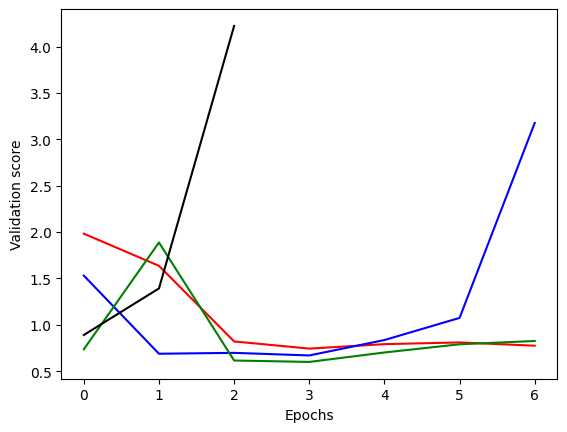

In [60]:
# Create the plot
plt.plot(model1_training.history['val_loss'], 'r', model2_training.history['val_loss'], 'b',
         model3_training.history['val_loss'], 'g', model4_training.history['val_loss'], 'black')
plt.xlabel('Epochs')
plt.ylabel('Validation score')

# Save the plot with high resolution
plt.savefig("train_performance.png", dpi=600, bbox_inches="tight")

plt.show()

## Model3 compute confusion matrix

In [20]:
from sklearn.metrics import confusion_matrix, classification_report

# Predict class probabilities on the test set
y_pred_prob = model3.predict(X_test)

# Convert probabilities to predicted class labels
y_pred = np.argmax(y_pred_prob, axis=1)  # Get the index of the maximum value in each row
y_true = np.argmax(y_test, axis=1)       # True class labels from one-hot encoding

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred)
print("Confusion Matrix:")
print(cm)

# Compute other metrics (precision, recall, F1-score, and support)
report = classification_report(y_true, y_pred, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(report)


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[126 164]
 [ 61 388]]

Classification Report:
              precision    recall  f1-score   support

        high       0.67      0.43      0.53       290
         low       0.70      0.86      0.78       449

    accuracy                           0.70       739
   macro avg       0.69      0.65      0.65       739
weighted avg       0.69      0.70      0.68       739



# **Select Model 3 for further optimization**
### **Model 3_1:** increase Dense = 400

In [21]:
# -------------------------- Model 3_1 -----------------------------------
# Specify Model 3_1: Hidden layer = 1, Dense = 400
model3_1 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(400, activation='relu'),  # Adjusted Dense units to 400
    Dense(2, activation='softmax')  # Output layer for binary classification
])

# Compile the model
model3_1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 3_1
model3_1_training = model3_1.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),  # Validation set
    epochs=30,
    callbacks=[early_stopping_monitor],  # Early stopping for preventing overfitting
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_1
test_loss3_1, test_accuracy3_1 = model3_1.evaluate(X_test, y_test, verbose=0)

# Print performance
print(f"Model 3_1 - Test Loss: {test_loss3_1:.4f}, Test Accuracy: {test_accuracy3_1:.4f}")


Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5255 - loss: 6.9549 - val_accuracy: 0.6549 - val_loss: 0.6202
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5768 - loss: 1.4437 - val_accuracy: 0.4290 - val_loss: 1.1894
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5813 - loss: 1.4949 - val_accuracy: 0.6062 - val_loss: 0.6921
Model 3_1 - Test Loss: 0.6202, Test Accuracy: 0.6549


### **Model 3_2:** add ReduceLROnPlateau

In [22]:
from tensorflow.keras.callbacks import ReduceLROnPlateau

# -------------------------- Model 3_2 -----------------------------------
# Specify Model 3_2: Hidden layer = 1, Dense = 200, with ReduceLROnPlateau
model3_2 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3_2.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define ReduceLROnPlateau callback
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',   # Monitor validation loss
    factor=0.1,           # Reduce learning rate by this factor
    patience=3,           # Number of epochs with no improvement before reducing
    min_lr=1e-6,          # Minimum learning rate
    verbose=1             # Display learning rate adjustment in logs
)

# Train Model 3_2
model3_2_training = model3_2.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping_monitor, reduce_lr],  # Add ReduceLROnPlateau
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_2
test_loss3_2, test_accuracy3_2 = model3_2.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_2 - Test Loss: {test_loss3_2:.4f}, Test Accuracy: {test_accuracy3_2:.4f}")


Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5347 - loss: 4.4556 - val_accuracy: 0.6198 - val_loss: 0.7873 - learning_rate: 0.0010
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5770 - loss: 0.8512 - val_accuracy: 0.6509 - val_loss: 0.7950 - learning_rate: 0.0010
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5781 - loss: 0.8811 - val_accuracy: 0.6414 - val_loss: 0.9124 - learning_rate: 0.0010
Model 3_2 - Test Loss: 0.7873, Test Accuracy: 0.6198


## **Model 3_3:** increase patience in Early Stop and in ReduceLROnPlateau

In [23]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------------- Model 3_3 -----------------------------------
# Specify Model 3_3: Same architecture as Model 3
model3_3 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3_3.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with increased patience
early_stopping_monitor_3_3 = EarlyStopping(
    patience=10,  # Increased patience for early stopping
    restore_best_weights=True,
    verbose=1
)

reduce_lr_3_3 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=7,  # Increased patience for ReduceLROnPlateau
    min_lr=1e-6,
    verbose=1
)

# Train Model 3_3
model3_3_training = model3_3.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Allow more epochs to observe the impact of increased patience
    callbacks=[early_stopping_monitor_3_3, reduce_lr_3_3],
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_3
test_loss3_3, test_accuracy3_3 = model3_3.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_3 - Test Loss: {test_loss3_3:.4f}, Test Accuracy: {test_accuracy3_3:.4f}")


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5358 - loss: 8.9926 - val_accuracy: 0.3802 - val_loss: 1.4454 - learning_rate: 0.0010
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5379 - loss: 1.1205 - val_accuracy: 0.6211 - val_loss: 0.9239 - learning_rate: 0.0010
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.6007 - loss: 0.8096 - val_accuracy: 0.6387 - val_loss: 0.8046 - learning_rate: 0.0010
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5972 - loss: 0.8118 - val_accuracy: 0.4154 - val_loss: 1.4514 - learning_rate: 0.0010
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5791 - loss: 1.3113 - val_accuracy: 0.5643 - val_loss: 0.7772 - learning_rate: 0.0010
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6347 - loss: 0.8003 - val_accuracy: 0.6915 - val_loss: 0.6244 - learning_rate: 0.0010
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.6514 - loss: 0.7686 - val_accuracy: 

## **Model 3_4:** continue with model3_3 & add dropout

In [24]:
from tensorflow.keras.layers import Dropout

# -------------------------- Model 3_4 -----------------------------------
# Specify Model 3_4: Add dropout layers to the architecture
model3_4 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dropout(0.3),  # Add dropout with 30% rate
    Dense(2, activation='softmax')
])

# Compile the model
model3_4.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks (same as in model3_3)
early_stopping_monitor_3_4 = EarlyStopping(
    patience=10,  # Same patience for early stopping as model3_3
    restore_best_weights=True,
    verbose=1
)

reduce_lr_3_4 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=7,  # Same patience for ReduceLROnPlateau as model3_3
    min_lr=1e-6,
    verbose=1
)

# Train Model 3_4
model3_4_training = model3_4.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Keep the same number of epochs
    callbacks=[early_stopping_monitor_3_4, reduce_lr_3_4],
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_4
test_loss3_4, test_accuracy3_4 = model3_4.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_4 - Test Loss: {test_loss3_4:.4f}, Test Accuracy: {test_accuracy3_4:.4f}")

# Get confusion matrix and classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred3_4 = model3_4.predict(X_test)
y_pred3_4_classes = y_pred3_4.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Compute confusion matrix
conf_matrix3_4 = confusion_matrix(y_test_classes, y_pred3_4_classes)
print("\nConfusion Matrix:")
print(conf_matrix3_4)

# Compute classification report
class_report3_4 = classification_report(y_test_classes, y_pred3_4_classes, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report3_4)


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5034 - loss: 62.1860 - val_accuracy: 0.6103 - val_loss: 4.2763 - learning_rate: 0.0010
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5347 - loss: 27.5059 - val_accuracy: 0.6157 - val_loss: 1.6300 - learning_rate: 0.0010
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5252 - loss: 17.3830 - val_accuracy: 0.6265 - val_loss: 1.6468 - learning_rate: 0.0010
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5778 - loss: 8.3031 - val_accuracy: 0.6441 - val_loss: 0.8504 - learning_rate: 0.0010
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5571 - loss: 4.2789 - val_accuracy: 0.6401 - val_loss: 0.9189 - learning_rate: 0.0010
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5651 - loss: 1.7562 - val_accuracy: 0.6143 - val_loss: 1.0774 - learning_rate: 0.0010
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5802 - loss: 0.9177 - val_accurac

## **Model 3_5:** add dropout, but with original model3

In [25]:
# -------------------------- Model 3_5 -----------------------------------
# Specify Model 3_5:
model3_5 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dropout(0.3),
    Dense(2, activation='softmax')
])

# Compile the model
model3_5.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train Model 3_5
model3_5_training = model3_5.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=30,
    callbacks=[early_stopping_monitor],
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_5
test_loss3_5, test_accuracy3_5 = model3_5.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_5 - Test Loss: {test_loss3_5:.4f}, Test Accuracy: {test_accuracy3_5:.4f}")

# Get confusion matrix and classification metrics
from sklearn.metrics import confusion_matrix, classification_report

# Predict on test set
y_pred3_5 = model3_5.predict(X_test)
y_pred3_5_classes = y_pred3_5.argmax(axis=1)
y_test_classes = y_test.argmax(axis=1)

# Compute confusion matrix
conf_matrix3_5 = confusion_matrix(y_test_classes, y_pred3_5_classes)
print("\nConfusion Matrix:")
print(conf_matrix3_5)

# Compute classification report
class_report3_5 = classification_report(y_test_classes, y_pred3_5_classes, target_names=label_encoder.classes_)
print("\nClassification Report:")
print(class_report3_5)

Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5538 - loss: 45.8518 - val_accuracy: 0.4317 - val_loss: 7.7591
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5231 - loss: 22.7189 - val_accuracy: 0.6279 - val_loss: 4.4615
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.5470 - loss: 11.8228 - val_accuracy: 0.6157 - val_loss: 4.9881
Model 3_5 - Test Loss: 7.7591, Test Accuracy: 0.4317
24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step

Confusion Matrix:
[[274  16]
 [404  45]]

Classification Report:
              precision    recall  f1-score   support

        high       0.40      0.94      0.57       290
         low       0.74      0.10      0.18       449

    accuracy                           0.43       739
   macro avg       0.57      0.52      0.37       739
weighted avg       0.61      0.43      0.33       739



## **Model 3_6:** increase epochs

In [26]:
# -------------------------- Model 3_6 -----------------------------------
# Specify Model 3_6: Increase epochs for training
model3_6 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3_6.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback (reuse or redefine if needed)
early_stopping_monitor_3_6 = EarlyStopping(
    patience=10,  # Patience for early stopping
    restore_best_weights=True,
    verbose=1
)

# Train Model 3_6 with increased epochs
model3_6_training = model3_6.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,  # Increased number of epochs
    callbacks=[early_stopping_monitor_3_6],
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_6
test_loss3_6, test_accuracy3_6 = model3_6.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_6 - Test Loss: {test_loss3_6:.4f}, Test Accuracy: {test_accuracy3_6:.4f}")


Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5327 - loss: 3.6185 - val_accuracy: 0.6184 - val_loss: 0.6782
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5887 - loss: 1.1159 - val_accuracy: 0.6482 - val_loss: 0.6287
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6013 - loss: 0.8795 - val_accuracy: 0.5467 - val_loss: 0.7448
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6106 - loss: 0.9510 - val_accuracy: 0.5318 - val_loss: 0.7971
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5729 - loss: 1.5222 - val_accuracy: 0.6468 - val_loss: 0.6411
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6318 - loss: 0.8466 - val_accuracy: 0.6143 - val_loss: 2.3174
Epoch 7/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5546 - loss: 1.9369 - val_accuracy: 0.6022 - val_loss: 0.6963
Epoch 8/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6607 - loss: 0.7853 - val_accuracy: 0.6942 - val_loss:

## **Model3_7:** increase epochs in model3_3

In [27]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------------- Model 3_7 -----------------------------------
# Specify Model 3_7: Same architecture as Model 3_3
model3_7 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3_7.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with increased patience
early_stopping_monitor_3_7 = EarlyStopping(
    patience=10,  # Same patience as in Model 3_3
    restore_best_weights=True,
    verbose=1
)

reduce_lr_3_7 = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=7,  # Same patience as in Model 3_3
    min_lr=1e-6,
    verbose=1
)

# Train Model 3_7 with increased epochs
model3_7_training = model3_7.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Increased number of epochs
    callbacks=[early_stopping_monitor_3_7, reduce_lr_3_7],
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_7
test_loss3_7, test_accuracy3_7 = model3_7.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_7 - Test Loss: {test_loss3_7:.4f}, Test Accuracy: {test_accuracy3_7:.4f}")


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5212 - loss: 6.7944 - val_accuracy: 0.6062 - val_loss: 0.7758 - learning_rate: 0.0010
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5739 - loss: 0.9555 - val_accuracy: 0.4046 - val_loss: 1.4175 - learning_rate: 0.0010
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5804 - loss: 0.9780 - val_accuracy: 0.6116 - val_loss: 1.6979 - learning_rate: 0.0010
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5502 - loss: 2.2449 - val_accuracy: 0.6252 - val_loss: 0.7748 - learning_rate: 0.0010
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6085 - loss: 1.2276 - val_accuracy: 0.4574 - val_loss: 1.2732 - learning_rate: 0.0010
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6007 - loss: 1.0836 - val_accuracy: 0.6955 - val_loss: 0.6168 - learning_rate: 0.0010
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6652 - loss: 0.7924 - val_acc

## **Model3_8:** add resampling technique

In [28]:
from sklearn.utils import resample
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.callbacks import EarlyStopping

# Resampling the training data
# Assuming y_train is not one-hot encoded initially
X_train_resampled, y_train_resampled = resample(
    X_train, y_train, replace=True, n_samples=len(X_train), random_state=42
)

# Check if `y_train` is already one-hot encoded; if not, apply one-hot encoding
if len(y_train_resampled.shape) == 1 or y_train_resampled.shape[1] == 1:
    y_train_resampled_onehot = to_categorical(y_train_resampled, num_classes=2)
else:
    y_train_resampled_onehot = y_train_resampled

# Debugging shapes
print(f"X_train_resampled shape: {X_train_resampled.shape}")
print(f"y_train_resampled shape: {y_train_resampled.shape}")
print(f"y_train_resampled_onehot shape: {y_train_resampled_onehot.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test shape: {y_test.shape}")

# -------------------------- Model 3_8 -----------------------------------
# Specify Model 3_8: Hidden layer = 1, Dense = 200
model3_8 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3_8.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping_monitor_3_8 = EarlyStopping(
    patience=5,
    restore_best_weights=True,
    verbose=1
)

# Train Model 3_8
model3_8_training = model3_8.fit(
    X_train_resampled, y_train_resampled_onehot,
    validation_data=(X_test, y_test),  # Ensure y_test is already one-hot encoded
    epochs=30,
    callbacks=[early_stopping_monitor_3_8],
    shuffle=True,
    verbose=1
)

# Evaluate Model 3_8
test_loss3_8, test_accuracy3_8 = model3_8.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_8 - Test Loss: {test_loss3_8:.4f}, Test Accuracy: {test_accuracy3_8:.4f}")

# Generate predictions and calculate confusion matrix
y_pred_probs = model3_8.predict(X_test)
y_pred_classes = y_pred_probs.argmax(axis=1)

from sklearn.metrics import confusion_matrix, classification_report

# Assuming y_test is one-hot encoded; get the class labels
y_test_classes = y_test.argmax(axis=1)

conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
class_report = classification_report(y_test_classes, y_pred_classes, target_names=['high', 'low'])

print("\nConfusion Matrix:")
print(conf_matrix)
print("\nClassification Report:")
print(class_report)


X_train_resampled shape: (2953, 11)
y_train_resampled shape: (2953, 2)
y_train_resampled_onehot shape: (2953, 2)
X_test shape: (739, 11)
y_test shape: (739, 2)
Epoch 1/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5448 - loss: 11.2649 - val_accuracy: 0.3951 - val_loss: 2.8383
Epoch 2/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5420 - loss: 1.5628 - val_accuracy: 0.3924 - val_loss: 4.2514
Epoch 3/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5522 - loss: 2.5616 - val_accuracy: 0.3924 - val_loss: 2.9724
Epoch 4/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5776 - loss: 1.3825 - val_accuracy: 0.5589 - val_loss: 0.9678
Epoch 5/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6014 - loss: 0.9742 - val_accuracy: 0.3924 - val_loss: 3.7681
Epoch 6/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5788 - loss: 1.7137 - val_accuracy: 0.6793 - val_loss: 0.8142
Epoch 7/30
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6000 - loss: 1.0653

# **Select model3_3 for hyperparameter tuning**

In [29]:
!pip install keras-tuner --quiet


In [30]:
import keras_tuner as kt
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input

# Define the model-building function
def build_model(hp):
    model = Sequential([
        Input(shape=(X_train.shape[1],)),  # Input layer
        Dense(hp.Int("units", min_value=100, max_value=400, step=50), activation='relu'),  # Dense layer with tunable units
        Dense(2, activation="softmax")  # Output layer
    ])
    model.compile(
        optimizer=Adam(learning_rate=hp.Choice("learning_rate", values=[1e-4, 1e-3, 1e-2])),
        loss="categorical_crossentropy",
        metrics=["accuracy"]
    )
    return model

# Define the tuner
tuner = kt.Hyperband(
    build_model,
    objective="val_accuracy",
    max_epochs=50,  # Increased epochs for better convergence
    factor=3,
    directory="my_dir",
    project_name="model3_3_tuning"
)

# Define callbacks for early stopping and learning rate reduction
early_stopping_monitor = EarlyStopping(
    patience=10,  # Stop if validation loss doesn't improve for 10 epochs
    restore_best_weights=True,
    verbose=1
)

reduce_lr = ReduceLROnPlateau(
    monitor="val_loss",
    factor=0.1,
    patience=7,
    min_lr=1e-6,
    verbose=1
)

# Run the hyperparameter search
tuner.search(
    X_train, y_train,
    validation_data=(X_test, y_test),
    callbacks=[early_stopping_monitor, reduce_lr],
    shuffle=True
)

# Display the best hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]
print(f"""
The optimal number of units is {best_hps.get('units')}
and the optimal learning rate is {best_hps.get('learning_rate')}.
""")

# Build the model with the best hyperparameters
best_model = tuner.hypermodel.build(best_hps)

# Train the best model
history = best_model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=50,
    callbacks=[early_stopping_monitor, reduce_lr],
    shuffle=True,
    verbose=1
)

# Evaluate the best model
test_loss, test_accuracy = best_model.evaluate(X_test, y_test, verbose=0)
print(f"Best Model - Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")


Reloading Tuner from my_dir/model3_3_tuning/tuner0.json

The optimal number of units is 300
and the optimal learning rate is 0.0001.

Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step - accuracy: 0.5739 - loss: 22.1697 - val_accuracy: 0.5737 - val_loss: 2.7737 - learning_rate: 1.0000e-04
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5734 - loss: 2.4711 - val_accuracy: 0.5440 - val_loss: 1.9323 - learning_rate: 1.0000e-04
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5710 - loss: 1.7267 - val_accuracy: 0.4966 - val_loss: 1.7823 - learning_rate: 1.0000e-04
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5890 - loss: 1.3940 - val_accuracy: 0.5345 - val_loss: 1.3352 - learning_rate: 1.0000e-04
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - accuracy: 0.5845 - loss: 1.1791 - val_accuracy: 0.4899 - val_loss: 1.2805 - learning_rate: 1.0000e-04
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - accuracy: 0.5949 - loss: 1.0549 - val_accur

## **Model3_10:** Assigning class weights during model training

In [31]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# -------------------- Ensure Proper One-Hot Encoding --------------------
# If y_train is already one-hot encoded, keep it as is
if y_train.ndim == 2 and y_train.shape[1] == 2:
    y_train_onehot = y_train  # Already one-hot encoded
else:
    y_train_onehot = to_categorical(y_train, num_classes=2)

# Ensure y_test is one-hot encoded
if y_test.ndim == 2 and y_test.shape[1] == 2:
    y_test_onehot = y_test  # Already one-hot encoded
else:
    y_test_onehot = to_categorical(y_test[:X_test.shape[0]], num_classes=2)  # Match X_test size

# Debug shapes
print(f"X_train shape: {X_train.shape}")
print(f"y_train_onehot shape: {y_train_onehot.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"y_test_onehot shape: {y_test_onehot.shape}")

# Ensure dimensions match
assert X_train.shape[0] == y_train_onehot.shape[0], (
    f"Mismatch: X_train has {X_train.shape[0]} samples, "
    f"y_train_onehot has {y_train_onehot.shape[0]} samples."
)
assert X_test.shape[0] == y_test_onehot.shape[0], (
    f"Mismatch: X_test has {X_test.shape[0]} samples, "
    f"y_test_onehot has {y_test_onehot.shape[0]} samples."
)

# -------------------- Calculate Class Weights --------------------
# Compute class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train.flatten() if y_train.ndim > 1 else y_train),
    y=y_train.flatten() if y_train.ndim > 1 else y_train
)

# Convert class weights to a dictionary
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}
print(f"Class Weights: {class_weights_dict}")

# -------------------- Model 3_10 Architecture --------------------
model_3_10 = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model_3_10.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Define callbacks
early_stopping = EarlyStopping(
    patience=15, restore_best_weights=True, verbose=1
)
reduce_lr = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=5,
    min_lr=1e-6,
    verbose=1
)

# -------------------- Train Model 3_10 --------------------
model_3_10_training = model_3_10.fit(
    X_train, y_train_onehot,  # Use one-hot encoded data
    validation_data=(X_test, y_test_onehot),  # Use correctly encoded test data
    epochs=50,
    class_weight=class_weights_dict,
    callbacks=[early_stopping, reduce_lr],
    verbose=1
)

# Evaluate the model
test_loss_3_10, test_accuracy_3_10 = model_3_10.evaluate(X_test, y_test_onehot, verbose=0)
print(f"Model 3_10 - Test Loss: {test_loss_3_10:.4f}, Test Accuracy: {test_accuracy_3_10:.4f}")


X_train shape: (2953, 11)
y_train_onehot shape: (2953, 2)
X_test shape: (739, 11)
y_test_onehot shape: (739, 2)
Class Weights: {0: 1.0, 1: 1.0}
Epoch 1/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - accuracy: 0.5528 - loss: 11.3070 - val_accuracy: 0.6698 - val_loss: 1.1116 - learning_rate: 0.0010
Epoch 2/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5976 - loss: 1.2693 - val_accuracy: 0.4127 - val_loss: 1.9127 - learning_rate: 0.0010
Epoch 3/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - accuracy: 0.5684 - loss: 1.3799 - val_accuracy: 0.3951 - val_loss: 2.3082 - learning_rate: 0.0010
Epoch 4/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.5643 - loss: 1.3524 - val_accuracy: 0.3978 - val_loss: 2.1079 - learning_rate: 0.0010
Epoch 5/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5811 - loss: 1.2740 - val_accuracy: 0.3992 - val_loss: 2.1109 - learning_rate: 0.0010
Epoch 6/50
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.5746 - loss: 1.2782
Epoch 6: ReduceLROnP

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Predict on the test set
y_pred_probs = model_3_10.predict(X_test)  # Predicted probabilities
y_pred_classes = np.argmax(y_pred_probs, axis=1)  # Predicted classes
y_test_classes = np.argmax(y_test_onehot, axis=1)  # True classes

# Generate the confusion matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)

# Generate classification report
class_report = classification_report(y_test_classes, y_pred_classes, target_names=["Class 0 (low)", "Class 1 (high)"])
print("\nClassification Report:")
print(class_report)

# Optionally, calculate metrics programmatically
from sklearn.metrics import precision_score, recall_score, f1_score

precision = precision_score(y_test_classes, y_pred_classes, average='binary')  # For binary classification
recall = recall_score(y_test_classes, y_pred_classes, average='binary')
f1 = f1_score(y_test_classes, y_pred_classes, average='binary')

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")


24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
Confusion Matrix:
[[139 151]
 [ 77 372]]

Classification Report:
                precision    recall  f1-score   support

 Class 0 (low)       0.64      0.48      0.55       290
Class 1 (high)       0.71      0.83      0.77       449

      accuracy                           0.69       739
     macro avg       0.68      0.65      0.66       739
  weighted avg       0.68      0.69      0.68       739

Precision: 0.7113
Recall: 0.8285
F1-Score: 0.7654


# **BEST Model** (model3_b)

In [33]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# -------------------------- Model 3_b -----------------------------------
# Specify Model 3_b: Same architecture as Model 3
model3_b = Sequential([
    Input(shape=(X_train.shape[1],)),
    Dense(200, activation='relu'),
    Dense(2, activation='softmax')
])

# Compile the model
model3_b.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define callbacks with increased patience
early_stopping_monitor_3_b = EarlyStopping(
    patience=10,  # Increased patience for early stopping
    restore_best_weights=True,
    verbose=1
)

reduce_lr_3_b = ReduceLROnPlateau(
    monitor='val_loss',
    factor=0.1,
    patience=7,  # Increased patience for ReduceLROnPlateau
    min_lr=1e-6,
    verbose=1
)

# Train Model 3_b
model3_b_training = model3_b.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=100,  # Allow more epochs to observe the impact of increased patience
    callbacks=[early_stopping_monitor_3_b, reduce_lr_3_b],
    shuffle=False,
    verbose=1
)

# Evaluate Model 3_3
test_loss3_b, test_accuracy3_b = model3_b.evaluate(X_test, y_test, verbose=0)
print(f"Model 3_b - Test Loss: {test_loss3_b:.4f}, Test Accuracy: {test_accuracy3_b:.4f}")


Epoch 1/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5372 - loss: 21.0074 - val_accuracy: 0.6116 - val_loss: 0.9584 - learning_rate: 0.0010
Epoch 2/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5923 - loss: 1.3762 - val_accuracy: 0.4953 - val_loss: 0.9716 - learning_rate: 0.0010
Epoch 3/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5927 - loss: 1.1286 - val_accuracy: 0.5467 - val_loss: 0.8621 - learning_rate: 0.0010
Epoch 4/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6206 - loss: 0.9772 - val_accuracy: 0.5494 - val_loss: 0.8233 - learning_rate: 0.0010
Epoch 5/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6429 - loss: 0.8244 - val_accuracy: 0.4249 - val_loss: 1.2658 - learning_rate: 0.0010
Epoch 6/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6065 - loss: 0.9823 - val_accuracy: 0.4181 - val_loss: 1.3036 - learning_rate: 0.0010
Epoch 7/100
93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6160 - loss: 0.9323 - val_ac

24/24 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step
AUC: 0.7367


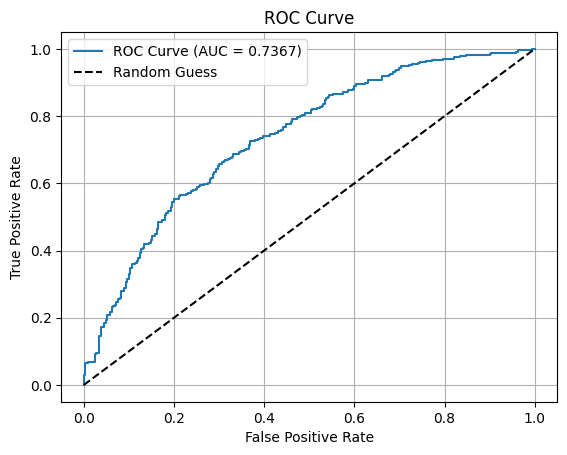

In [61]:
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import numpy as np

# -------------------- Predictions --------------------
# Get predicted probabilities
y_pred_probs = model3_b.predict(X_test)  # Probability scores

# Get predicted classes
y_pred_classes = np.argmax(y_pred_probs, axis=1)

# True classes
y_true_classes = np.argmax(y_test, axis=1)

# -------------------- AUC and ROC Curve --------------------
# Compute AUC score
auc_score = roc_auc_score(y_true_classes, y_pred_probs[:, 1])
print(f"AUC: {auc_score:.4f}")

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true_classes, y_pred_probs[:, 1])

# Plot ROC curve
plt.figure()
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {auc_score:.4f})")
plt.plot([0, 1], [0, 1], "k--", label="Random Guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid()

# Save the plot with high resolution
plt.savefig("AUC_model3b.png", dpi=600, bbox_inches="tight")

plt.show()

Confusion Matrix:
[[151 139]
 [ 91 358]]


<Figure size 640x480 with 0 Axes>

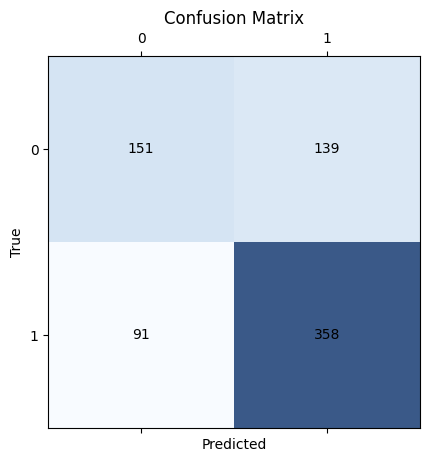

Classification Report:
                precision    recall  f1-score   support

 Class 0 (low)       0.62      0.52      0.57       290
Class 1 (high)       0.72      0.80      0.76       449

      accuracy                           0.69       739
     macro avg       0.67      0.66      0.66       739
  weighted avg       0.68      0.69      0.68       739

Precision: 0.7203
Recall: 0.7973
F1-Score: 0.7569


In [35]:
# -------------------- Confusion Matrix --------------------
# Compute confusion matrix
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print(f"Confusion Matrix:\n{conf_matrix}")

# Visualize confusion matrix
plt.figure()
plt.matshow(conf_matrix, cmap="Blues", alpha=0.8)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        plt.text(x=j, y=i, s=conf_matrix[i, j], ha="center", va="center")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

# -------------------- Classification Metrics --------------------
# Generate classification report
class_report = classification_report(y_true_classes, y_pred_classes, target_names=["Class 0 (low)", "Class 1 (high)"])
print("Classification Report:")
print(class_report)

# Compute precision, recall, and F1-score manually
precision = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[0, 1])
recall = conf_matrix[1, 1] / (conf_matrix[1, 1] + conf_matrix[1, 0])
f1_score = 2 * (precision * recall) / (precision + recall)

print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1_score:.4f}")

# **Model3_b SHAP analysis**
https://www.datacamp.com/tutorial/introduction-to-shap-values-machine-learning-interpretability

In [36]:
import pandas as pd
import numpy as np
import shap

# ... your existing code ...

# Before initializing the SHAP explainer, ensure X_train has the correct data type:
# If your model was trained with a pandas DataFrame, use this:
X_train_numeric = X_train.astype(np.float32)  # Ensure all columns are numeric type

# If your model was trained with a NumPy array, you may skip this step.

# Initialize the SHAP explainer with the correctly formatted data:
explainer = shap.Explainer(model3_b, X_train_numeric)

# Compute SHAP values:
shap_values = explainer(X_train_numeric)

PermutationExplainer explainer: 2954it [08:22,  5.80it/s]


### **Summary plot**

In [37]:
# Ensure all columns in X_train are numeric
X_train = X_train.apply(pd.to_numeric, errors="coerce")

# Confirm no NaN values exist after conversion
if X_train.isnull().any().any():
    print("Warning: Missing values detected!")
    print(X_train.isnull().sum())
else:
    print("No missing values in X_train after conversion.")

No missing values in X_train after conversion.


In [38]:
# Ensure feature names are explicitly extracted
feature_names = X_train.columns.tolist()
print("Feature Names:", feature_names)

Feature Names: ['distance', 'head', 'age', 'meanbw', 'temp', 'timetrans_min', 'lairagetime', 'season_summer', 'season_winter', 'timegr_morning', 'timegr_night']


In [39]:
# Convert X_train to NumPy array
X_train_np = X_train.values
print("X_train_np shape:", X_train_np.shape)

X_train_np shape: (2953, 11)


In [40]:
# Debug SHAP values
print(f"SHAP Values Shape: {shap_values.values.shape}")

SHAP Values Shape: (2953, 11, 2)


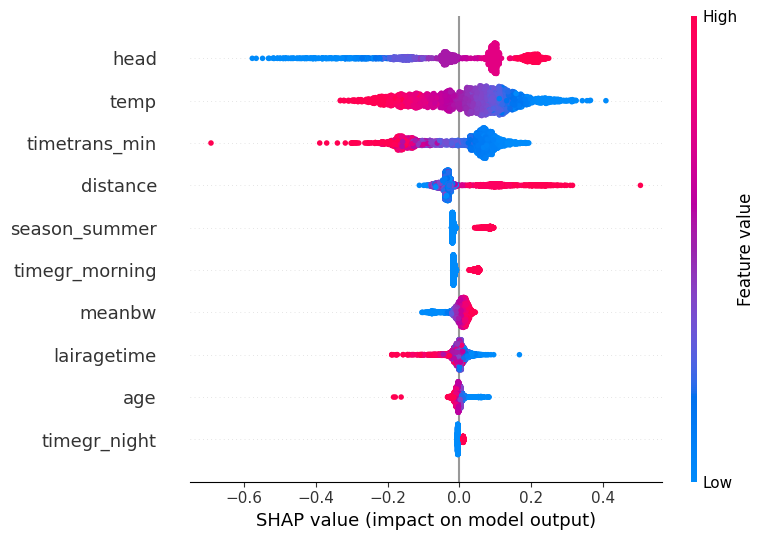

In [64]:
# Select SHAP values for the 'high' class (class index 1)
shap_values_high = shap_values.values[:, :, 1]

import shap
import matplotlib.pyplot as plt

# Generate the SHAP beeswarm plot
shap.summary_plot(
    shap_values_high,
    X_train_np,
    feature_names=feature_names,
    max_display=10,
    show=False  # Do not display immediately
)

# Save the plot with high resolution
plt.savefig("shap_summary_plot_beeswarm.png", dpi=600, bbox_inches="tight")
plt.show()

### **Bar plot**

SHAP values for class 'high': (2953, 11)


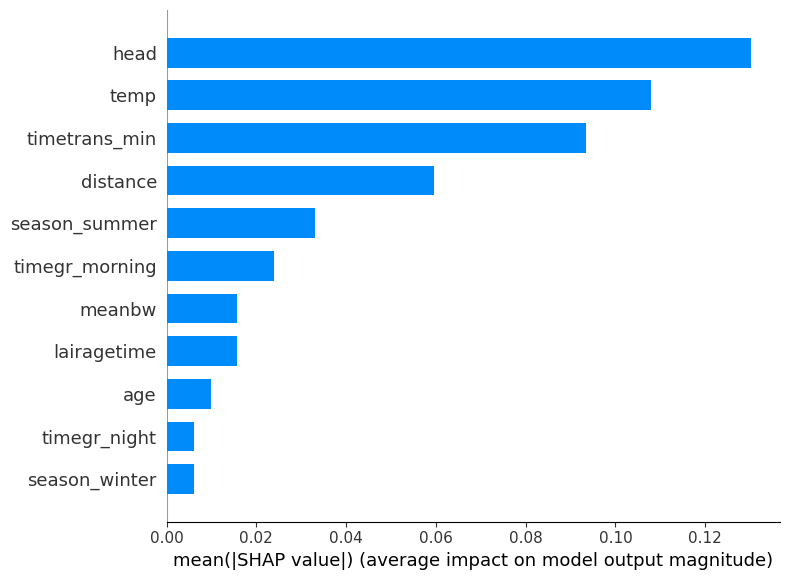

In [65]:
# Select SHAP values for the 'high' class (class index 1)
shap_values_class_high = shap_values[:, :, 1]  # Extract SHAP values for class 1

# Verify the shape
print(f"SHAP values for class 'high': {shap_values_class_high.shape}")  # Should be (2953, 11)

# Generate the bar plot for feature importance
shap.summary_plot(shap_values_class_high, X_train_np, plot_type="bar", feature_names=feature_names, show=False)

# Save the plot with high resolution
plt.savefig("shap_bar_plot.png", dpi=600, bbox_inches="tight")
plt.show()

### **Dependence plot**

In [43]:
pip install shap --upgrade

### **Select top 5 important variables**
head, temp, timetrans_min, distance, timegr_morning

In [44]:
X_train_np = np.array(X_train_np, dtype=float)  # Ensure features are numeric
shap_values_high = np.array(shap_values_high)   # Ensure SHAP values are numeric

<Figure size 640x480 with 0 Axes>

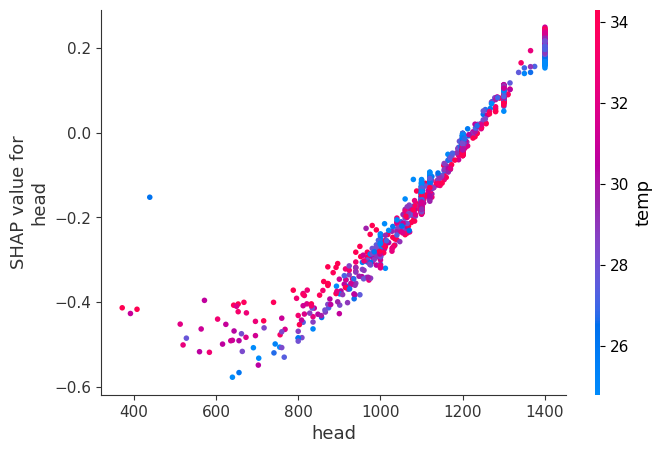

In [66]:
import shap
import matplotlib.pyplot as plt

# Plot dependence for a single feature
plt.figure()
try:
    shap.dependence_plot(
        ind=1,  # Feature index for 'head'
        shap_values=shap_values_high,  # SHAP values for the 'high' class
        features=X_train_np,  # Feature dataset
        feature_names=feature_names,  # List of feature names
        show=False
    )
    # Save the plot with high resolution
    plt.savefig("dependence_head.png", dpi=600, bbox_inches="tight")
    plt.show()
except Exception as e:
    print(f"Error generating dependence plot: {e}")

<Figure size 640x480 with 0 Axes>

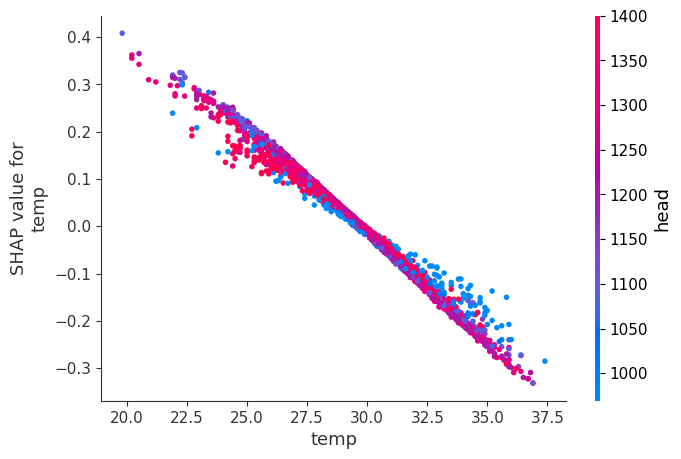

In [67]:
import shap
import matplotlib.pyplot as plt

# Plot dependence for a single feature
plt.figure()
try:
    shap.dependence_plot(
        ind=4,  # Feature index for 'temp'
        shap_values=shap_values_high,  # SHAP values for the 'high' class
        features=X_train_np,  # Feature dataset
        feature_names=feature_names,  # List of feature names
        show=False
    )
    # Save the plot with high resolution
    plt.savefig("dependence_temp.png", dpi=600, bbox_inches="tight")
    plt.show()
except Exception as e:
    print(f"Error generating dependence plot: {e}")

<Figure size 640x480 with 0 Axes>

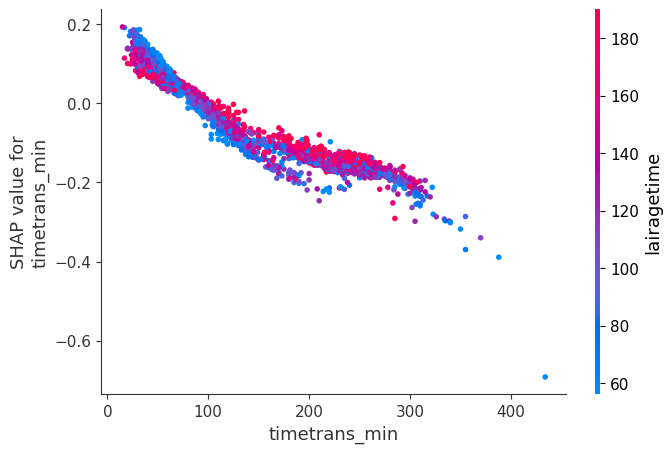

In [68]:
import shap
import matplotlib.pyplot as plt

# Plot dependence for a single feature
plt.figure()
try:
    shap.dependence_plot(
        ind=5,  # Feature index for 'timetrans_min'
        shap_values=shap_values_high,  # SHAP values for the 'high' class
        features=X_train_np,  # Feature dataset
        feature_names=feature_names,  # List of feature names
        show=False
    )
    # Save the plot with high resolution
    plt.savefig("dependence_timetrans_min.png", dpi=600, bbox_inches="tight")
    plt.show()
except Exception as e:
    print(f"Error generating dependence plot: {e}")

<Figure size 640x480 with 0 Axes>

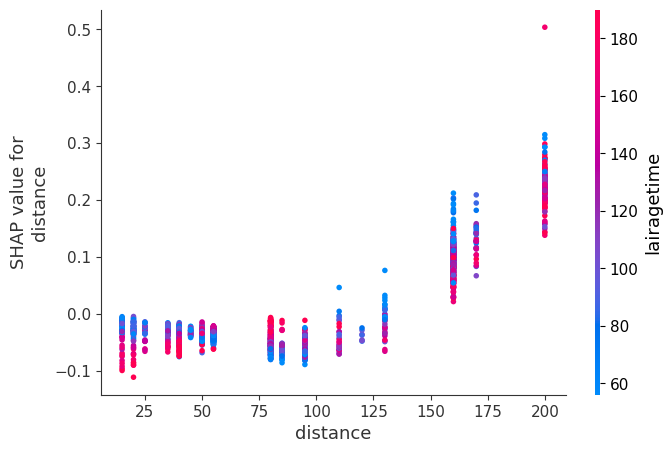

In [69]:
import shap
import matplotlib.pyplot as plt

# Plot dependence for a single feature
plt.figure()
try:
    shap.dependence_plot(
        ind=0,  # Feature index for 'distance'
        shap_values=shap_values_high,  # SHAP values for the 'high' class
        features=X_train_np,  # Feature dataset
        feature_names=feature_names,  # List of feature names
        show=False
    )
    # Save the plot with high resolution
    plt.savefig("dependence_distance.png", dpi=600, bbox_inches="tight")
    plt.show()
except Exception as e:
    print(f"Error generating dependence plot: {e}")

<Figure size 640x480 with 0 Axes>

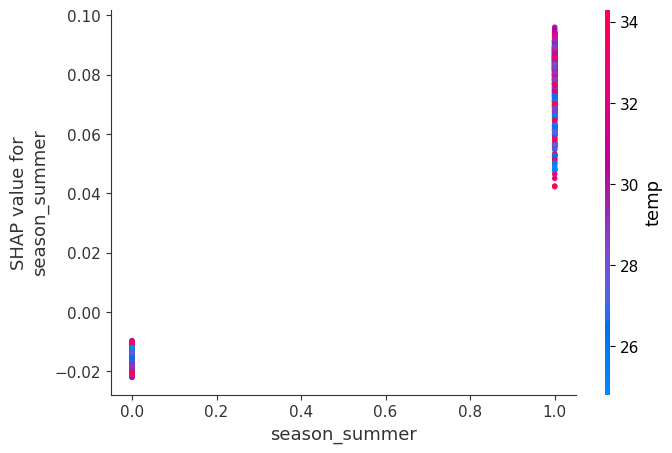

In [70]:
import shap
import matplotlib.pyplot as plt

# Plot dependence for a single feature
plt.figure()
try:
    shap.dependence_plot(
        ind=7,  # Feature index for 'season_summer'
        shap_values=shap_values_high,  # SHAP values for the 'high' class
        features=X_train_np,  # Feature dataset
        feature_names=feature_names,  # List of feature names
        show=False
    )
    # Save the plot with high resolution
    plt.savefig("dependence_season_summer.png", dpi=600, bbox_inches="tight")
    plt.show()
except Exception as e:
    print(f"Error generating dependence plot: {e}")

### **Force plot**

In [50]:
# Calculate the expected value (mean prediction for the 'high' class)
expected_value = np.mean(model3_b.predict(X_train_numeric)[:, 1])  # Mean probability for the 'high' class

93/93 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


In [51]:
import shap

shap.initjs()  # Initialize JavaScript visualization

### **Force plot for lowest doapct instance**
instance 1 (index = 0), doapct = 0

In [52]:
import shap
import matplotlib.pyplot as plt

# Select one instance to explain (e.g., the first row of your dataset)
instance_index = 0  # Replace with the row index you want to visualize
shap_values_single_0 = shap_values.values[instance_index, :, 1]  # SHAP values for 'high' class
features_single_0 = X_train_np[instance_index, :]  # Feature values for the selected instance

# Generate the force plot
shap.initjs()  # Initialize JavaScript for visualization
force_plot_0 = shap.force_plot(
    base_value=expected_value,  # Manually calculated expected value
    shap_values=shap_values_single_0,  # SHAP values for the selected instance
    features=features_single_0,  # Feature values for the selected instance
    feature_names=feature_names  # Feature names
)

# Display the plot
force_plot_0

In [71]:
import shap

# Save the force plot as an HTML file
shap.save_html("force_plot_instance_0.html", force_plot_0)

# If using Google Colab, download the file to your local machine
from google.colab import files
files.download("force_plot_instance_0.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

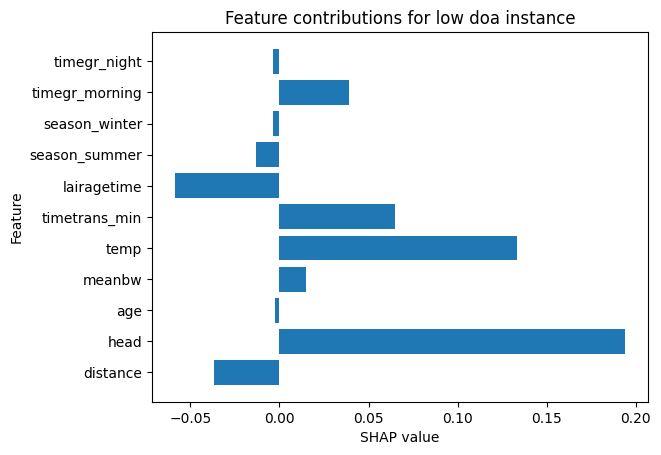

In [72]:
import matplotlib.pyplot as plt

# Plot the SHAP values for a single instance as a horizontal bar plot
plt.barh(feature_names, shap_values_single_0)
plt.xlabel("SHAP value")
plt.ylabel("Feature")
plt.title("Feature contributions for low doa instance")

# Save the plot with high resolution
plt.savefig("feat_contribute_low.png", dpi=600, bbox_inches="tight")

plt.show()

## **Force plot for highest doapct instance**

In [54]:
highest_doapct_index = df['doapct'].idxmax()  # Index of the instance with the highest doapct

In [55]:
instance_to_explain = X_train.iloc[highest_doapct_index, :]

In [56]:
import shap
import matplotlib.pyplot as plt

# Select the SHAP values for the identified instance
shap_values_single = shap_values.values[highest_doapct_index, :, 1]  # SHAP values for the 'high' class
features_single = X_train_np[highest_doapct_index, :]  # Feature values for the selected instance

# Generate the force plot
shap.initjs()  # Initialize JavaScript for visualization
force_plot = shap.force_plot(
    base_value=expected_value,  # Manually calculated expected value
    shap_values=shap_values_single,  # SHAP values for the selected instance
    features=features_single,  # Feature values for the selected instance
    feature_names=feature_names  # Feature names
)

# Display the plot
force_plot

In [73]:
import shap

# Save the force plot as an HTML file
shap.save_html("force_plot_highest_doa.html", force_plot)

# If using Google Colab, download the file to your local machine
from google.colab import files
files.download("force_plot_highest_doa.html")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

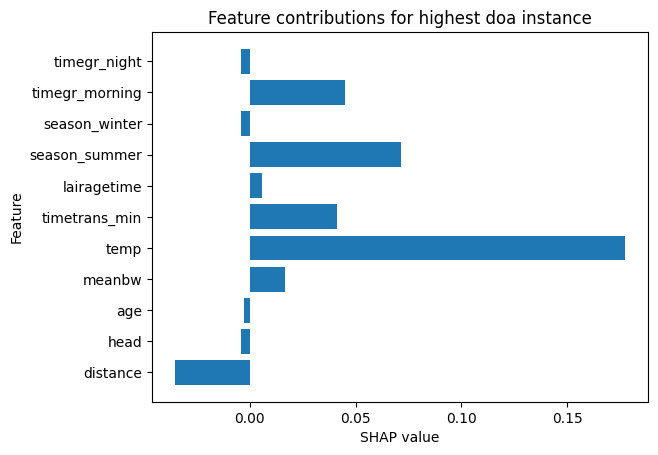

In [74]:
import matplotlib.pyplot as plt

# Plot the SHAP values for a single instance as a horizontal bar plot
plt.barh(feature_names, shap_values_single)
plt.xlabel("SHAP value")
plt.ylabel("Feature")
plt.title("Feature contributions for highest doa instance")

# Save the plot with high resolution
plt.savefig("feat_contribute_highest.png", dpi=600, bbox_inches="tight")

plt.show()

### **Decision plot**

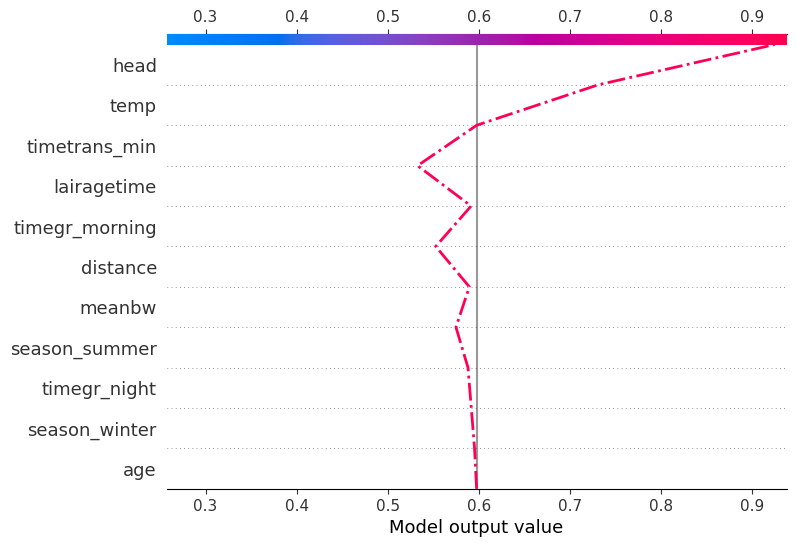

<Figure size 640x480 with 0 Axes>

In [75]:
import shap
import matplotlib.pyplot as plt

# Select an instance to explain (e.g., the first row)
instance_index = 0  # Replace with the desired row index

# Generate a decision plot
shap.decision_plot(
    base_value=expected_value,                # Manually calculated expected value
    shap_values=shap_values.values[instance_index, :, 1],  # SHAP values for the 'high' class
    feature_names=feature_names,             # Feature names
    feature_order="importance",              # Optional: Order features by importance
    highlight=0                              # Optional: Highlight the selected instance
)

# Save the plot with high resolution
plt.savefig("decision_plot_lowdoa.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()

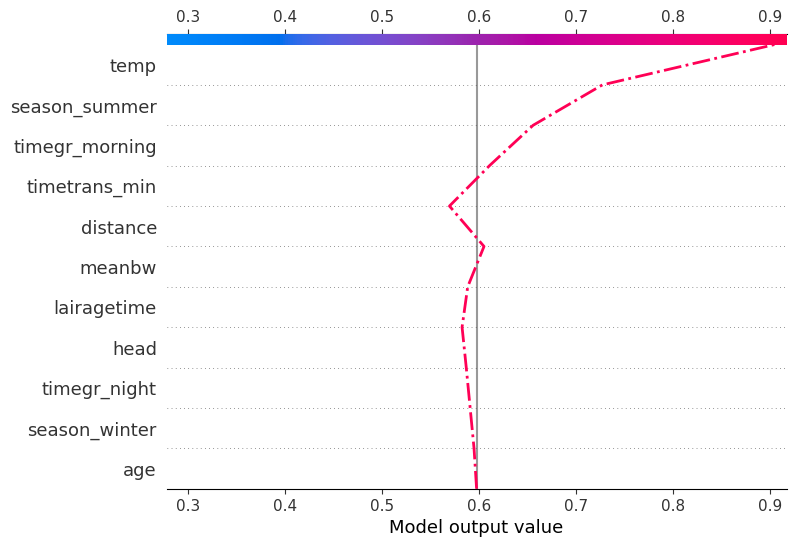

<Figure size 640x480 with 0 Axes>

In [76]:
import shap
import matplotlib.pyplot as plt

# Select an instance to explain (e.g., the first row)
# highest_doapct_index

# Generate a decision plot
shap.decision_plot(
    base_value=expected_value,                # Manually calculated expected value
    shap_values=shap_values.values[highest_doapct_index, :, 1],  # SHAP values for the 'high' class
    feature_names=feature_names,             # Feature names
    feature_order="importance",              # Optional: Order features by importance
    highlight=0                              # Optional: Highlight the selected instance
)

# Save the plot with high resolution
plt.savefig("decision_plot_highest_doa.png", dpi=600, bbox_inches="tight")

# Display the plot
plt.show()

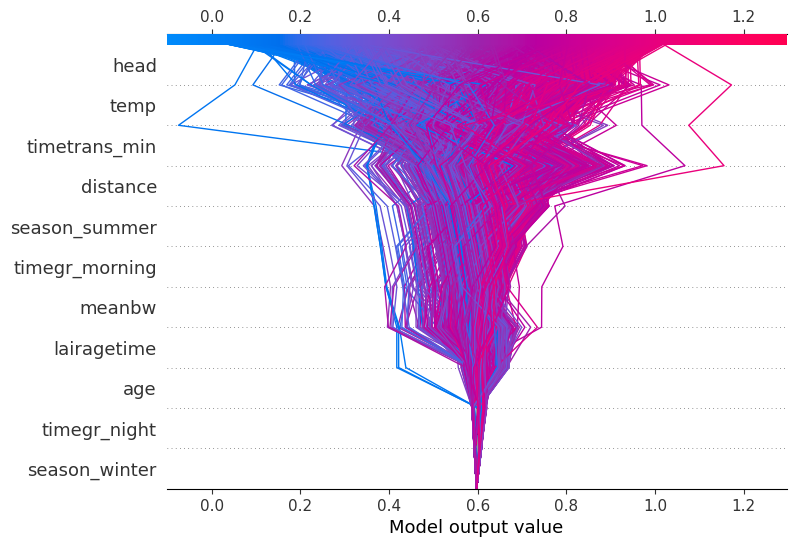

<Figure size 640x480 with 0 Axes>

In [77]:
import shap
import matplotlib.pyplot as plt

# Generate a decision plot for all instances
shap.decision_plot(
    base_value=expected_value,                # Manually calculated expected value
    shap_values=shap_values.values[:, :, 1],  # SHAP values for the 'high' class (all instances)
    feature_names=feature_names,             # Feature names
    feature_order="importance",              # Order features by importance
    ignore_warnings=True                     # Ignore warnings about large datasets
)

# Save the plot with high resolution
plt.savefig("decision_plot_all_instance.png", dpi=600, bbox_inches="tight")

plt.show()


### ▶ ALL DONE ◀



